In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
#posts = dd.read_csv("Complete-Posts-Compressed/*.tar.xz", compression="xz")
posts = dd.read_csv("Complete-Posts/*.csv")

In [3]:
#posts.astype(float).corr().compute()#["isAnswered"]

In [4]:
#posts.astype(float).describe().compute()

## Warning: in memory computations

In [5]:
df = posts.compute()

In [6]:
## TODO remove outliers
df = df.loc[df["AnswerCount"]<25]
df = df.loc[df["BlocksCount"]<10]
df = df.loc[df["LinksCount"]<10]

In [7]:
df.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07   
mean   1.920363e+00  2.109085e+03  8.911707e+01  2.949882e-01  1.999033e+00   
std    2.620062e+01  1.443399e+04  6.360844e+01  7.007091e-01  1.984313e+00   
min   -1.850000e+02  1.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  7.700000e+01  4.800000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.720000e+02  7.400000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  9.620000e+02  1.110000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount  tagsAggregate  
count     1.641965e+07  1.641965e+07  1.641965e+07   1.641965e+07  
mean      8.576060e+00  1.536222e+00  1.969255e+00   9.488850e+05  
std       3.603330e+00  1.366787e+00  2.661569e+00   8.476725e+05  
min       1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%       6.000000e+00  1.000000e+00  0.000000e+00   1.692600e+05  
50%       8.000000e+00  1.000000e+00  1.000000e+00   8.844655e+05  
75%       1.100000e+01  2.000000e+00  3.000000e+00   1.487235e+06  
max       4.500000e+01  2.400000e+01  1.090000e+02   6.680300e+06

In [8]:
df.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.479918  -0.000210    0.006207     0.002353   
ViewCount        0.479918   1.000000  -0.020764   -0.006160    -0.005261   
WordCount       -0.000210  -0.020764   1.000000    0.186468     0.141789   
LinksCount       0.006207  -0.006160   0.186468    1.000000     0.027251   
BlocksCount      0.002353  -0.005261   0.141789    0.027251     1.000000   
TitleWordsCount -0.000917  -0.007807   0.080503    0.012303    -0.005675   
AnswerCount      0.182987   0.347396  -0.040102   -0.045883    -0.000874   
CommentCount     0.007655  -0.000663   0.060552    0.014099     0.105541   
bounty           0.038449   0.016084   0.071942    0.067407     0.031113   
tagsAggregate   -0.005348   0.003601   0.001363    0.011735     0.082253   
isAnswered       0.035820   0.067257  -0.016104   -0.008990     0.072871   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.000917     0.182987      0.007655  0.038449   
ViewCount              -0.007807     0.347396     -0.000663  0.016084   
WordCount               0.080503    -0.040102      0.060552  0.071942   
LinksCount              0.012303    -0.045883      0.014099  0.067407   
BlocksCount            -0.005675    -0.000874      0.105541  0.031113   
TitleWordsCount         1.000000    -0.017552     -0.004141  0.006800   
AnswerCount            -0.017552     1.000000     -0.005900  0.071757   
CommentCount           -0.004141    -0.005900      1.000000  0.051184   
bounty                  0.006800     0.071757      0.051184  1.000000   
tagsAggregate           0.003319     0.075937      0.123745 -0.009987   
isAnswered             -0.016378     0.269489     -0.073088  0.009253   

                 tagsAggregate  isAnswered  
Score                -0.005348    0.035820  
ViewCount             0.003601    0.067257  
WordCount             0.001363   -0.016104  
LinksCount            0.011735   -0.008990  
BlocksCount           0.082253    0.072871  
TitleWordsCount       0.003319   -0.016378  
AnswerCount           0.075937    0.269489  
CommentCount          0.123745   -0.073088  
bounty               -0.009987    0.009253  
tagsAggregate         1.000000    0.028121  
isAnswered            0.028121    1.000000

# Simple plots

Score


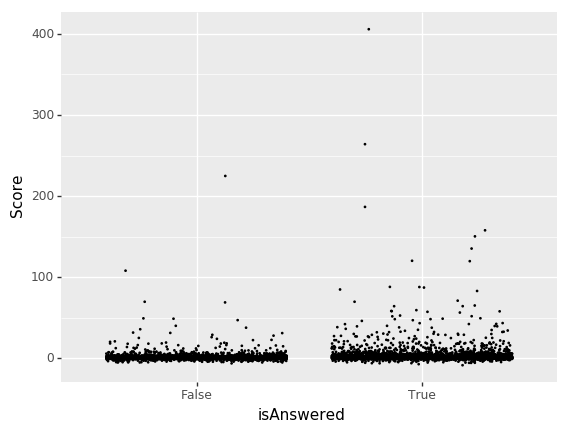

<ggplot: (-9223363266391604220)>
ViewCount


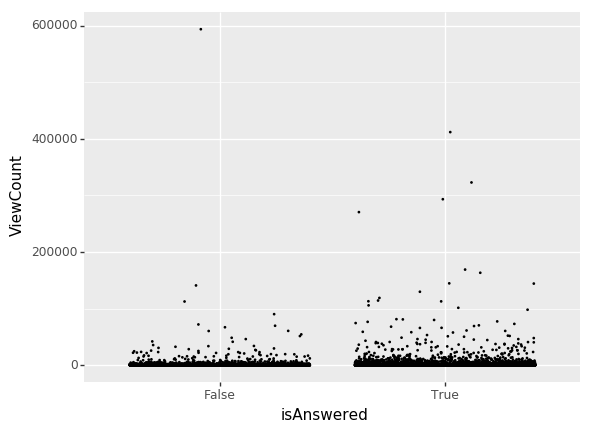

<ggplot: (8770463170985)>
WordCount


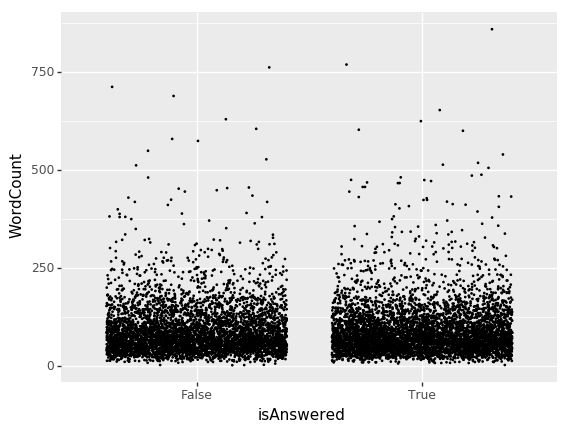

<ggplot: (8770463172637)>
LinksCount


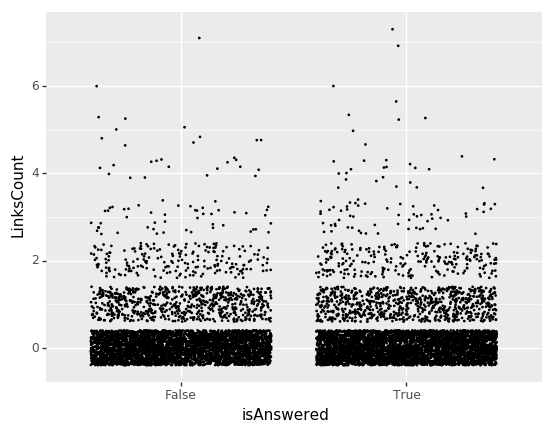

<ggplot: (-9223363266391350356)>
BlocksCount


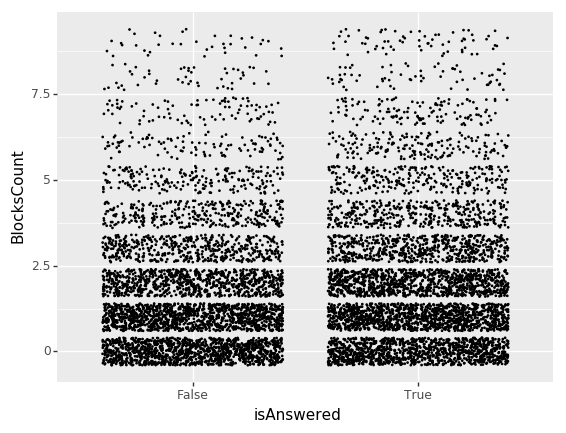

<ggplot: (-9223363266391605437)>
TitleWordsCount


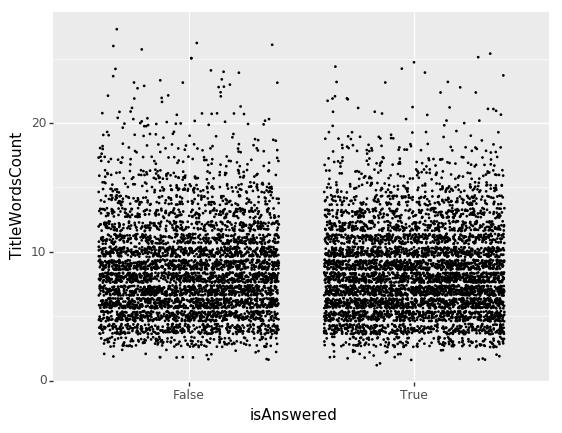

<ggplot: (8770463171788)>
AnswerCount


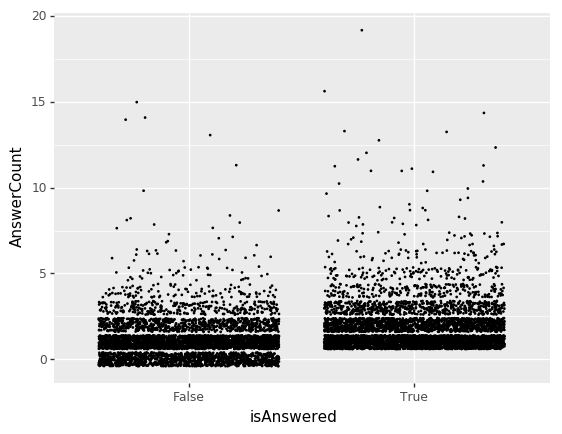

<ggplot: (8770466535951)>
CommentCount


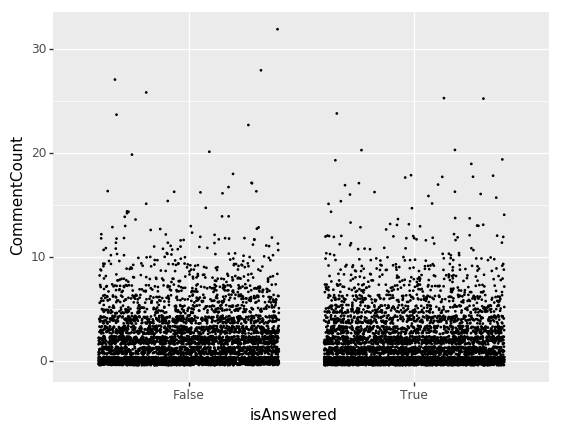

<ggplot: (8770464806755)>
bounty


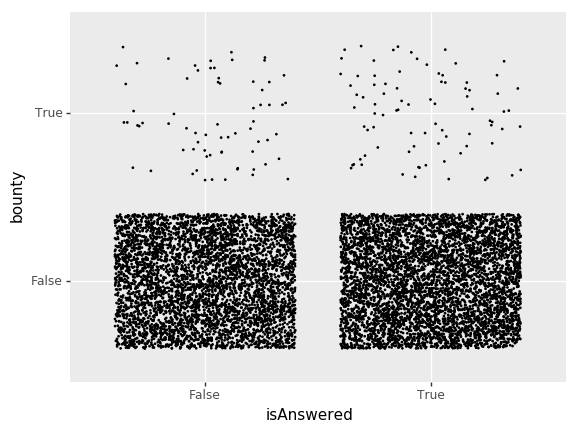

<ggplot: (8770499647538)>
tagsAggregate


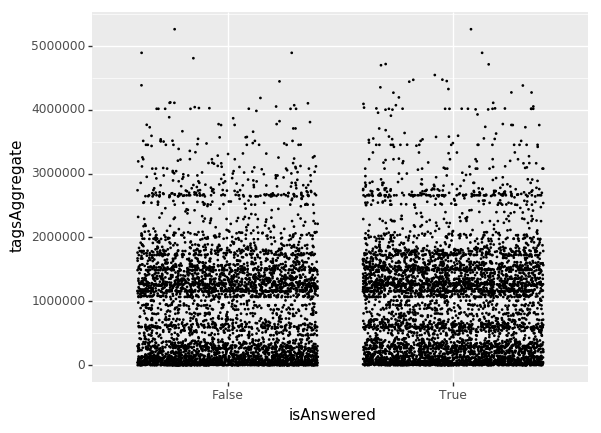

<ggplot: (8770463983301)>


In [56]:
# plot random sample of 10000 points 
temp_df = df.sample(n=10000)
for column in df:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_df, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

# More plots

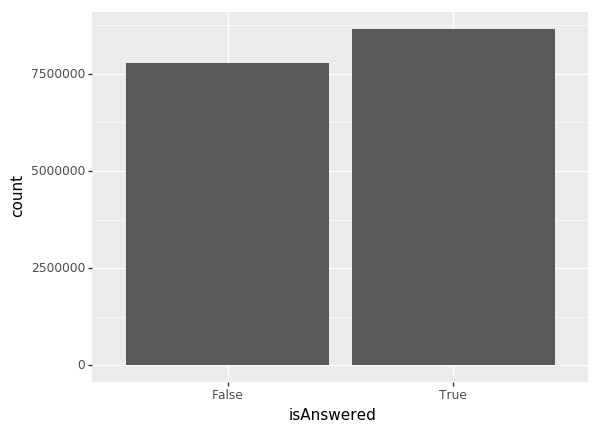

<ggplot: (-9223363266355235219)>

In [10]:
#do not re-run this
plot = ggplot(df, aes(x="isAnswered"))
plot += geom_bar()
plot

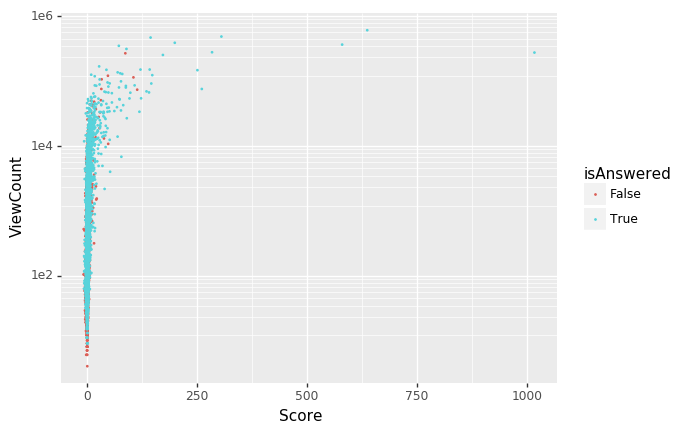

<ggplot: (-9223363266355099332)>

In [11]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_log10()
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 468 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


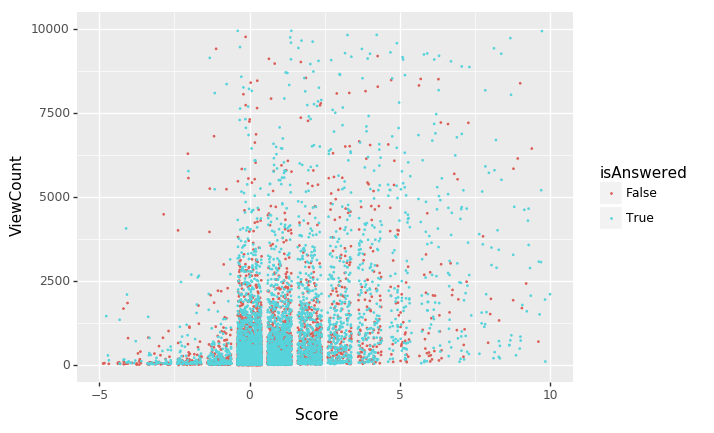

<ggplot: (-9223363266380246938)>

In [34]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-5,10)
plot += ylim(0,10000)
plot += geom_jitter(size=0.1)
plot

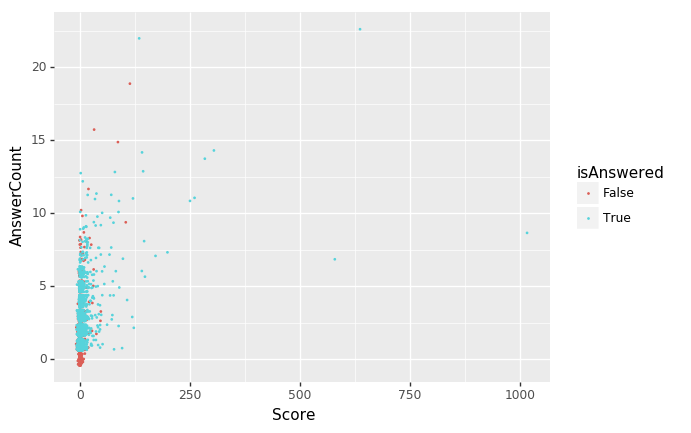

<ggplot: (-9223363266355097705)>

In [13]:
plot = ggplot(temp_df, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot

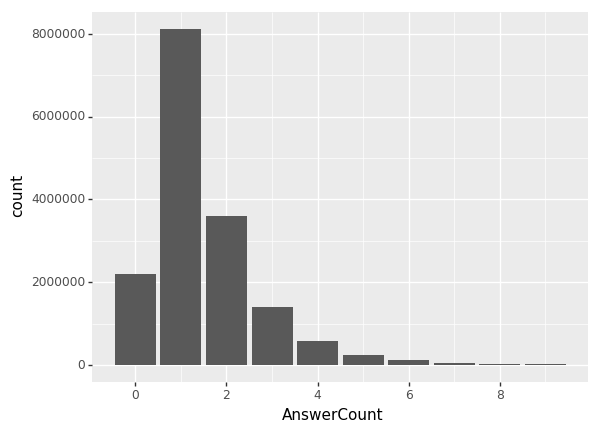

<ggplot: (8770499676648)>

In [14]:
#do not re-run this
plot = ggplot(df.loc[df["AnswerCount"]<10], aes(x="AnswerCount"))
plot += geom_bar()
plot += scale_x_continuous(breaks=range(0,10,2))
plot

In [15]:
# TODO caluclate number of posts with 0 answers
sum(df["AnswerCount"]==0)

2201947

# Conclusions

In [16]:
sum(df["Score"]>=5)

1245633

In [17]:
sum(df["ViewCount"]>=50)

13953454

In [44]:
Score_treshold = 4

# Ignored posts

In [19]:
# check ignored posts
ignored = df.loc[df["Score"]<Score_treshold]
#ignored = ignored.loc[ignored["ViewCount"]<50]

In [20]:
ignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07   
mean   4.784798e-01  7.776552e+02  8.835747e+01  2.859574e-01  1.990906e+00   
std    1.155952e+00  2.014715e+03  6.196382e+01  6.818104e-01  1.963023e+00   
min   -1.850000e+02  1.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  6.900000e+01  4.800000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.160000e+02  7.300000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  7.000000e+02  1.110000e+02  0.000000e+00  3.000000e+00   
max    3.000000e+00  2.744710e+05  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount  tagsAggregate  
count     1.474524e+07  1.474524e+07  1.474524e+07   1.474524e+07  
mean      8.586457e+00  1.378259e+00  1.965728e+00   9.579844e+05  
std       3.621450e+00  1.065311e+00  2.637641e+00   8.566613e+05  
min       1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%       6.000000e+00  1.000000e+00  0.000000e+00   1.713380e+05  
50%       8.000000e+00  1.000000e+00  1.000000e+00   9.053490e+05  
75%       1.100000e+01  2.000000e+00  3.000000e+00   1.487400e+06  
max       4.500000e+01  2.400000e+01  1.090000e+02   6.680300e+06

In [21]:
ignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.194282   0.092886    0.042363     0.056226   
ViewCount        0.194282   1.000000   0.002875   -0.012576    -0.010757   
WordCount        0.092886   0.002875   1.000000    0.171615     0.138875   
LinksCount       0.042363  -0.012576   0.171615    1.000000     0.020397   
BlocksCount      0.056226  -0.010757   0.138875    0.020397     1.000000   
TitleWordsCount -0.003857  -0.017940   0.080145    0.010779    -0.007450   
AnswerCount      0.081173   0.227799  -0.059291   -0.067415     0.016073   
CommentCount    -0.099058  -0.019833   0.048479    0.004446     0.103774   
bounty           0.069708   0.013737   0.042173    0.036252     0.017925   
tagsAggregate   -0.056684   0.005312   0.001922    0.012401     0.084728   
isAnswered       0.102492   0.094964  -0.015775   -0.010981     0.076479   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.003857     0.081173     -0.099058  0.069708   
ViewCount              -0.017940     0.227799     -0.019833  0.013737   
WordCount               0.080145    -0.059291      0.048479  0.042173   
LinksCount              0.010779    -0.067415      0.004446  0.036252   
BlocksCount            -0.007450     0.016073      0.103774  0.017925   
TitleWordsCount         1.000000    -0.018754     -0.006023  0.003391   
AnswerCount            -0.018754     1.000000     -0.027777  0.035702   
CommentCount           -0.006023    -0.027777      1.000000  0.021415   
bounty                  0.003391     0.035702      0.021415  1.000000   
tagsAggregate           0.004199     0.106910      0.126706 -0.013186   
isAnswered             -0.015978     0.293753     -0.073852  0.014282   

                 tagsAggregate  isAnswered  
Score                -0.056684    0.102492  
ViewCount             0.005312    0.094964  
WordCount             0.001922   -0.015775  
LinksCount            0.012401   -0.010981  
BlocksCount           0.084728    0.076479  
TitleWordsCount       0.004199   -0.015978  
AnswerCount           0.106910    0.293753  
CommentCount          0.126706   -0.073852  
bounty               -0.013186    0.014282  
tagsAggregate         1.000000    0.033279  
isAnswered            0.033279    1.000000

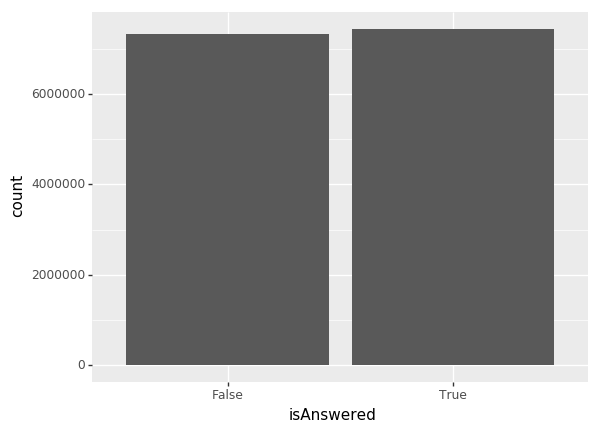

<ggplot: (-9223363266355099297)>

In [22]:
#do not re-run this
plot = ggplot(ignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [23]:
# how many ignored posts has 0 answers (proportion)
sum(ignored["AnswerCount"]==0)/ignored.shape[0]

0.14665256494551293

In [24]:
sum(ignored["AnswerCount"]==0)

2162428

Score


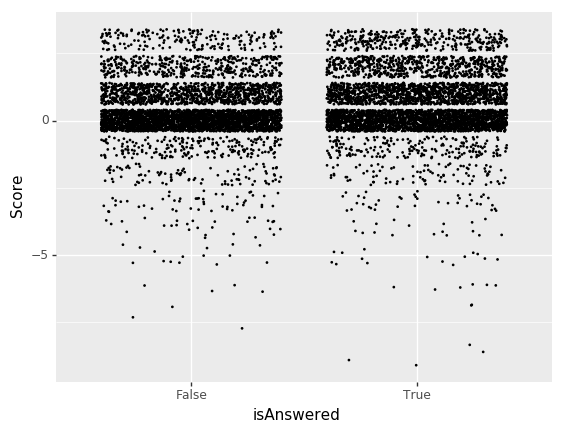

<ggplot: (-9223363266389013013)>
ViewCount


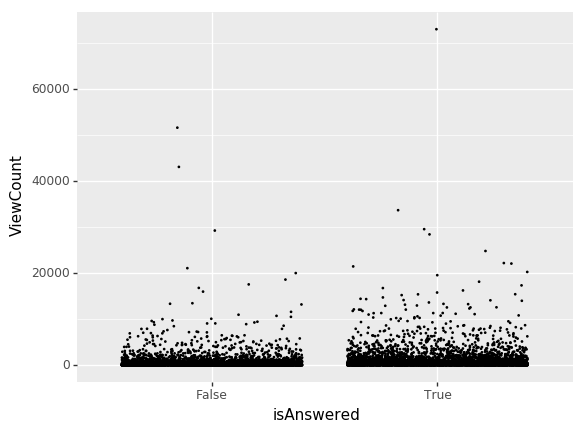

<ggplot: (-9223363266355012762)>
WordCount


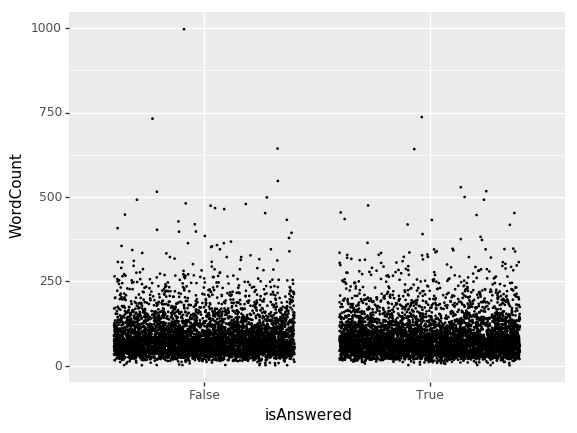

<ggplot: (8770524559231)>
LinksCount


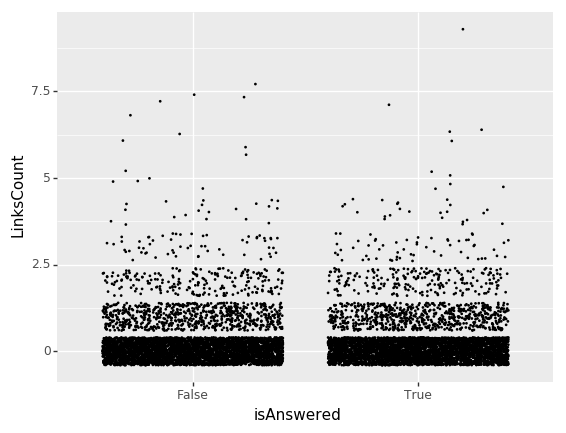

<ggplot: (-9223363266390906557)>
BlocksCount


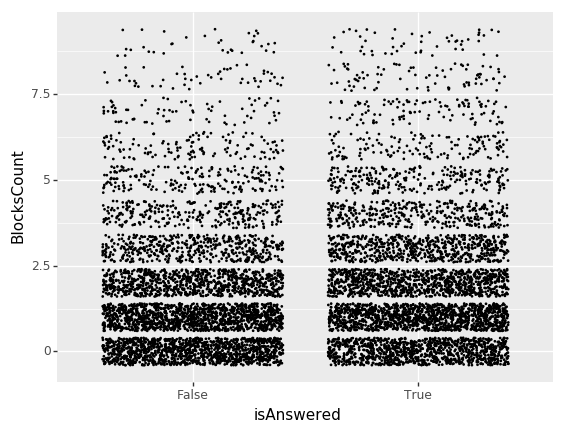

<ggplot: (8770466868488)>
TitleWordsCount


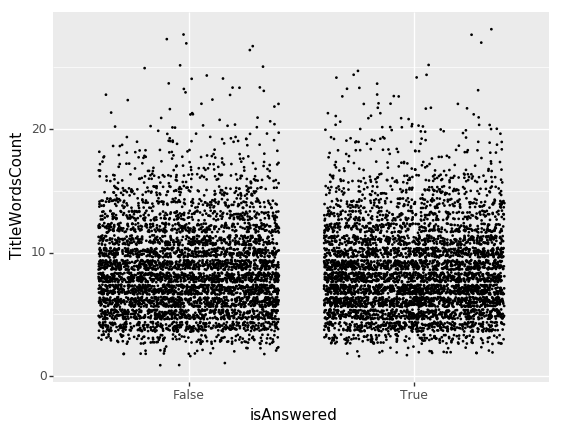

<ggplot: (-9223363266390357914)>
AnswerCount


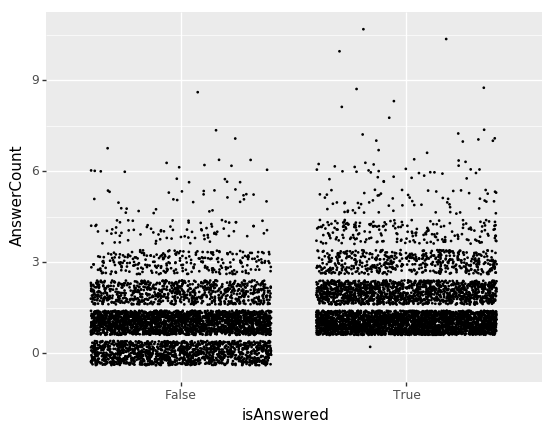

<ggplot: (8770464693091)>
CommentCount


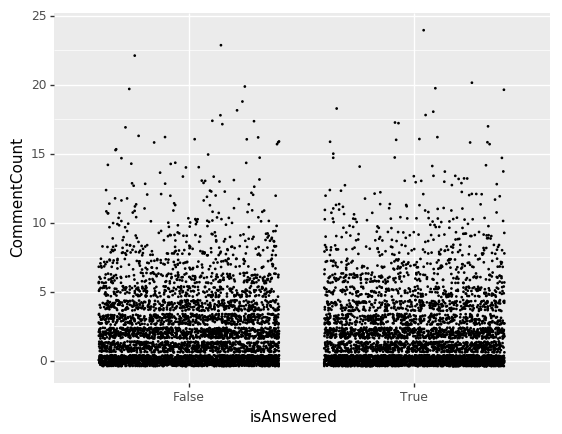

<ggplot: (8770463558902)>
bounty


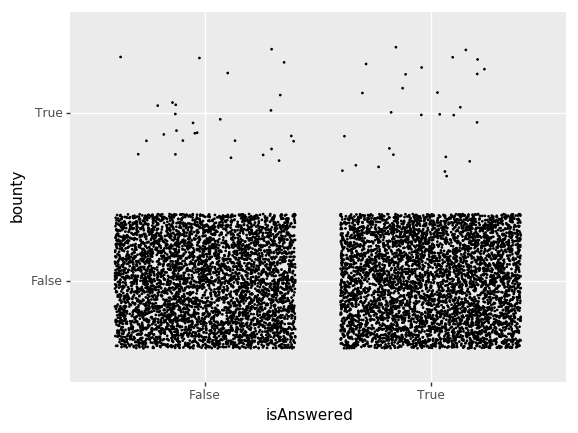

<ggplot: (8770464001663)>
tagsAggregate


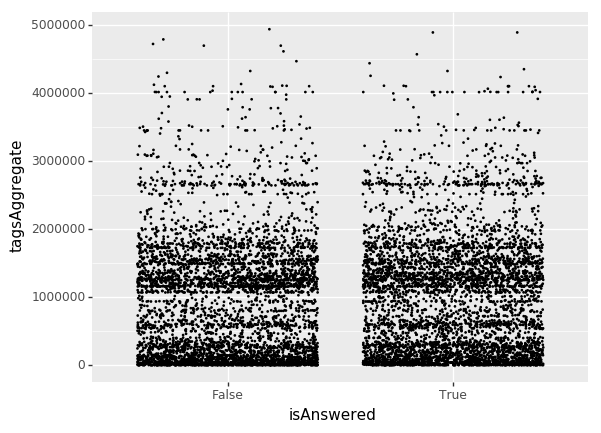

<ggplot: (8770463873165)>


In [57]:
temp_ii = ignored.sample(n=10000)
for column in ignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ii, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 828 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


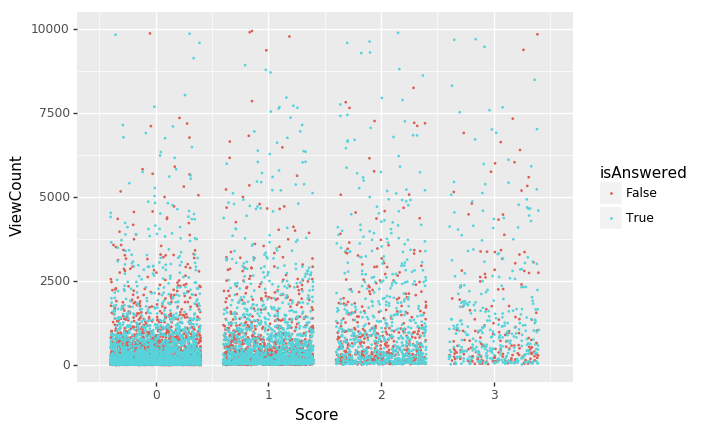

<ggplot: (8770463961471)>

In [52]:
plot = ggplot(temp_ii, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(0,10000)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 1600 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


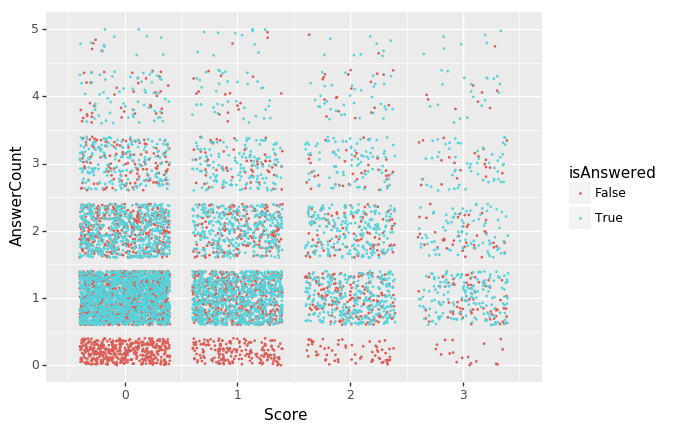

<ggplot: (8770463551699)>

In [53]:
plot = ggplot(temp_ii, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(0,5)
plot += geom_jitter(size=0.1)
plot

# Not ignored posts

In [25]:
# remove ignored posts
notignored = df.loc[df["Score"]>=Score_treshold]
#df = df.loc[df["ViewCount"]>=50]

In [26]:
notignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06   
mean   1.461793e+01  1.383397e+04  9.580631e+01  3.745154e-01  2.070607e+00   
std    8.087283e+01  4.306046e+04  7.625530e+01  8.450082e-01  2.161448e+00   
min    4.000000e+00  1.600000e+01  2.000000e+00  0.000000e+00  0.000000e+00   
25%    4.000000e+00  1.110000e+03  4.800000e+01  0.000000e+00  0.000000e+00   
50%    6.000000e+00  3.726000e+03  7.600000e+01  0.000000e+00  1.000000e+00   
75%    1.100000e+01  1.140200e+04  1.200000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  3.872000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount  tagsAggregate  
count     1.674409e+06  1.674409e+06  1.674409e+06   1.674409e+06  
mean      8.484499e+00  2.927277e+00  2.000313e+00   8.687530e+05  
std       3.438284e+00  2.484000e+00  2.863485e+00   7.592687e+05  
min       1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%       6.000000e+00  1.000000e+00  0.000000e+00   1.521490e+05  
50%       8.000000e+00  2.000000e+00  1.000000e+00   7.314060e+05  
75%       1.000000e+01  4.000000e+00  3.000000e+00   1.364141e+06  
max       3.300000e+01  2.400000e+01  1.030000e+02   6.121273e+06

In [27]:
notignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.462327  -0.025394   -0.004406    -0.005354   
ViewCount        0.462327   1.000000  -0.084493   -0.041146    -0.021892   
WordCount       -0.025394  -0.084493   1.000000    0.264755     0.159001   
LinksCount      -0.004406  -0.041146   0.264755    1.000000     0.068341   
BlocksCount     -0.005354  -0.021892   0.159001    0.068341     1.000000   
TitleWordsCount  0.002114  -0.011034   0.088662    0.026970     0.010197   
AnswerCount      0.217585   0.418272  -0.053240   -0.058550    -0.080109   
CommentCount     0.032195   0.002213   0.139775    0.076324     0.118237   
bounty           0.007459  -0.052887   0.141472    0.135308     0.069768   
tagsAggregate    0.007533   0.042746   0.007240    0.018177     0.066039   
isAnswered       0.033870   0.066538  -0.065348   -0.041954     0.032100   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                   0.002114     0.217585      0.032195  0.007459   
ViewCount              -0.011034     0.418272      0.002213 -0.052887   
WordCount               0.088662    -0.053240      0.139775  0.141472   
LinksCount              0.026970    -0.058550      0.076324  0.135308   
BlocksCount             0.010197    -0.080109      0.118237  0.069768   
TitleWordsCount         1.000000    -0.008044      0.012222  0.028167   
AnswerCount            -0.008044     1.000000      0.060277 -0.024780   
CommentCount            0.012222     0.060277      1.000000  0.147388   
bounty                  0.028167    -0.024780      0.147388  1.000000   
tagsAggregate          -0.008982     0.067698      0.100863  0.020019   
isAnswered             -0.008885     0.102050     -0.079907 -0.121115   

                 tagsAggregate  isAnswered  
Score                 0.007533    0.033870  
ViewCount             0.042746    0.066538  
WordCount             0.007240   -0.065348  
LinksCount            0.018177   -0.041954  
BlocksCount           0.066039    0.032100  
TitleWordsCount      -0.008982   -0.008885  
AnswerCount           0.067698    0.102050  
CommentCount          0.100863   -0.079907  
bounty                0.020019   -0.121115  
tagsAggregate         1.000000    0.027272  
isAnswered            0.027272    1.000000

In [28]:
# how many ignored posts has 0 answers (proportion)
sum(notignored["AnswerCount"]==0)/notignored.shape[0]

0.02360176038231997

In [29]:
sum(notignored["AnswerCount"]==0)

39519

Score


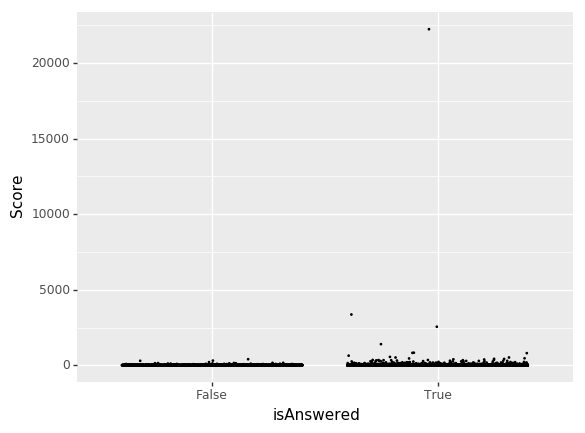

<ggplot: (8770463550121)>
ViewCount


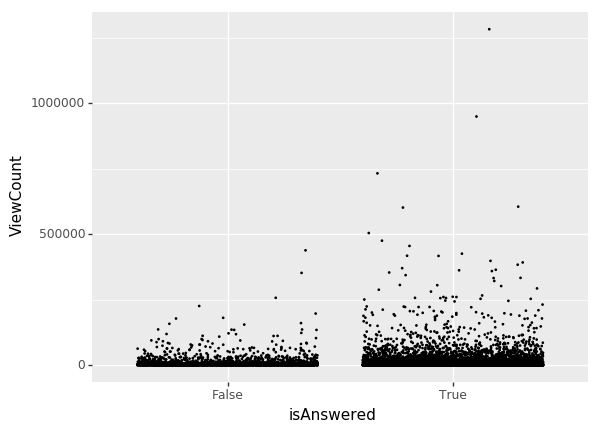

<ggplot: (-9223363266389007549)>
WordCount


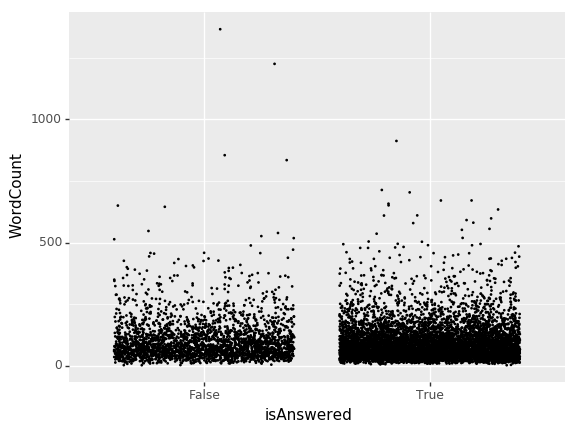

<ggplot: (-9223363266391209107)>
LinksCount


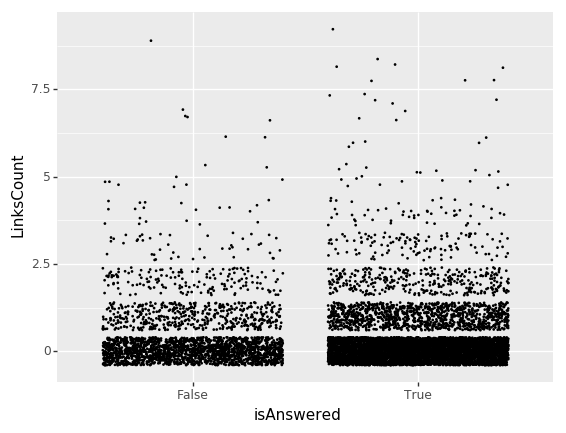

<ggplot: (-9223363266389007500)>
BlocksCount


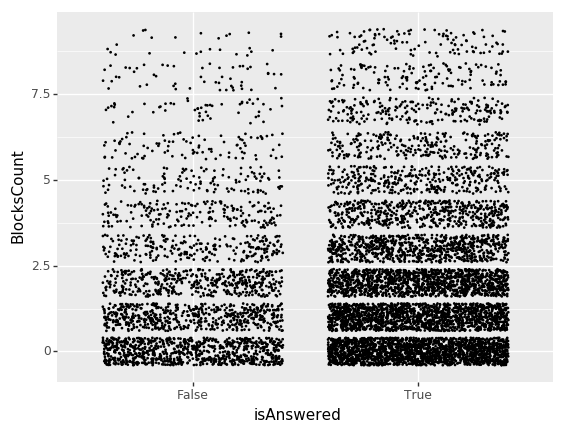

<ggplot: (8770465768228)>
TitleWordsCount


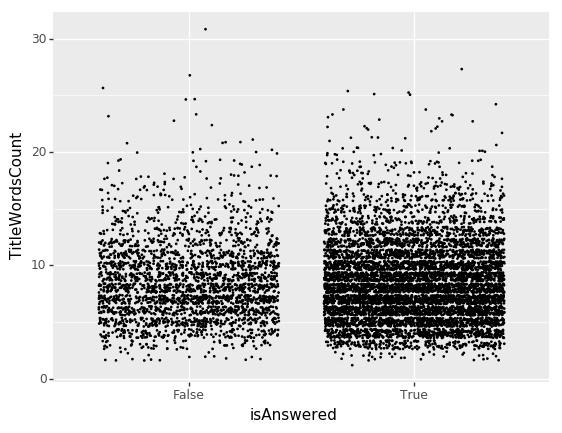

<ggplot: (8770463959104)>
AnswerCount


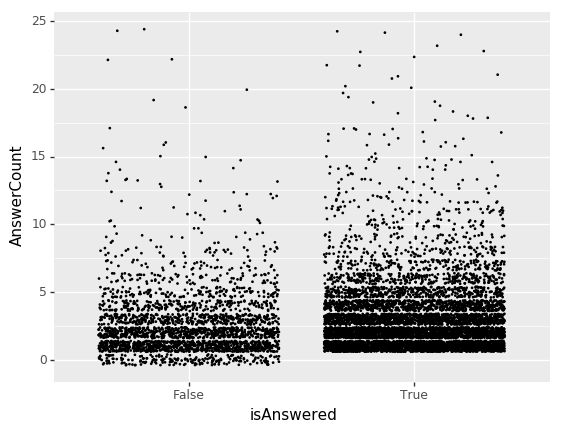

<ggplot: (8770463957617)>
CommentCount


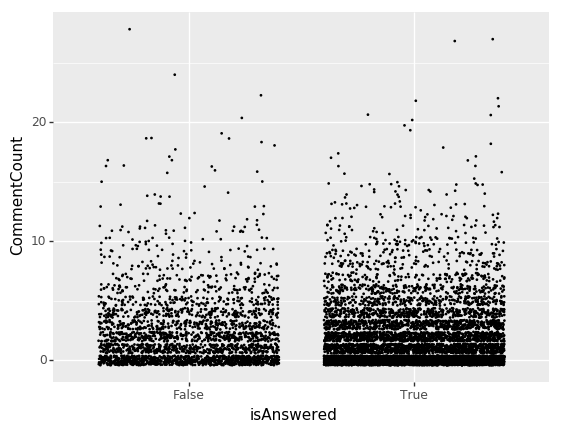

<ggplot: (8770463970010)>
bounty


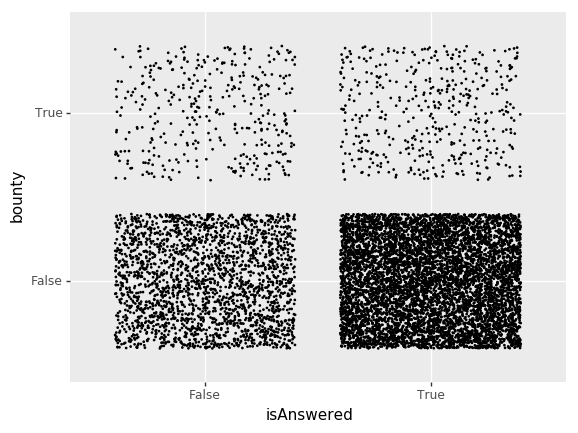

<ggplot: (8770463874084)>
tagsAggregate


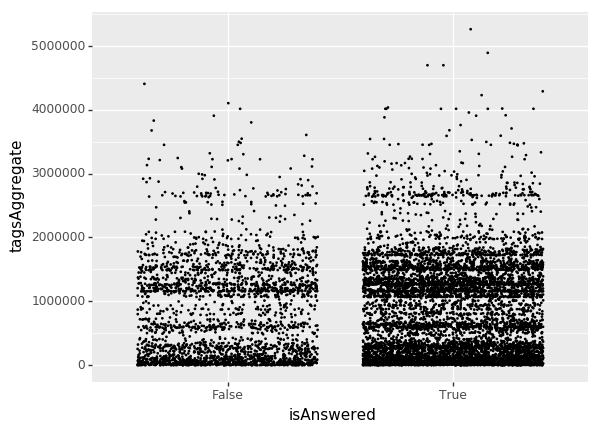

<ggplot: (-9223363266390905095)>


In [58]:
temp_ni = notignored.sample(n=10000)
for column in notignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ni, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

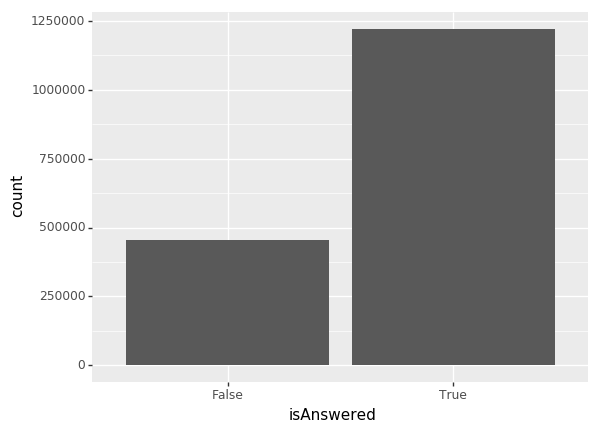

<ggplot: (-9223363266380392616)>

In [31]:
#do not re-run this
plot = ggplot(notignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [37]:
# proportion answered to not answered
sum(notignored["isAnswered"]==1)/sum(notignored["isAnswered"]==0)

2.6860065028694957

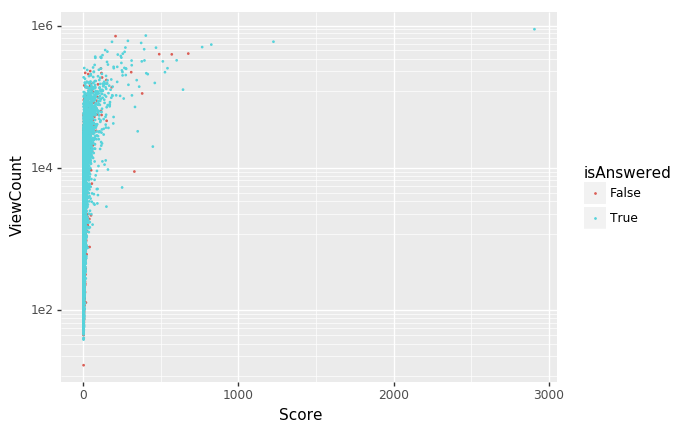

<ggplot: (8770463174478)>

In [55]:
plot = ggplot(temp_ni, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_log10()
plot

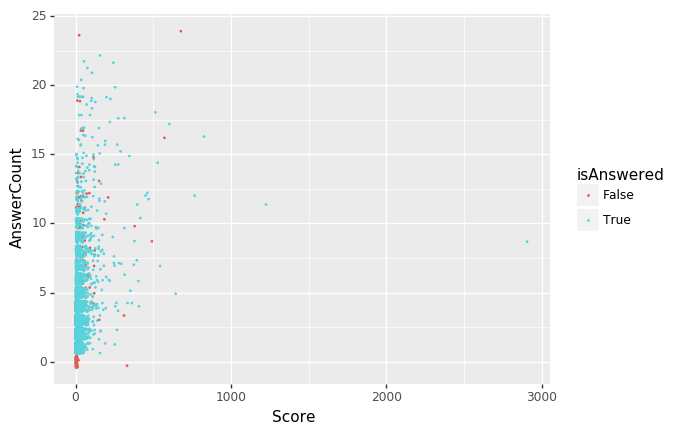

<ggplot: (8770474245938)>

In [33]:
plot = ggplot(temp_ni, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot